In [42]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.html.widgets import interact, interact_manual
import matplotlib.finance as matfn
import matplotlib.dates as matdates
import matplotlib.ticker as matticker
import seaborn as sns

In [2]:
# Dow Sectors ###############################################
DJI_Sectors = pd.read_csv('Data/Dow_Index.csv', sep = ',')
# DJI_Sectors = DJI_Sectors[['symbol','sector']]
DJI_Sectors

,Unnamed: 0,symbol,company,weight,sector,shares_held
0,1,BA,Boeing Company,0.081468,Industrials,5984499
1,2,GS,Goldman Sachs Group Inc.,0.072404,Financials,5984499
2,3,MMM,3M Company,0.066475,Industrials,5984499
3,4,UNH,UnitedHealth Group Incorporated,0.062516,Health Care,5984499
4,5,HD,Home Depot Inc.,0.051083,Consumer Discretionary,5984499
5,6,MCD,McDonald's Corporation,0.048394,Consumer Discretionary,5984499
6,7,AAPL,Apple Inc.,0.048245,Information Technology,5984499
7,8,IBM,International Business Machines Corporation,0.044041,Information Technology,5984499
8,9,CAT,Caterpillar Inc.,0.040299,Industrials,5984499
9,10,JNJ,Johnson & Johnson,0.040068,Health Care,5984499


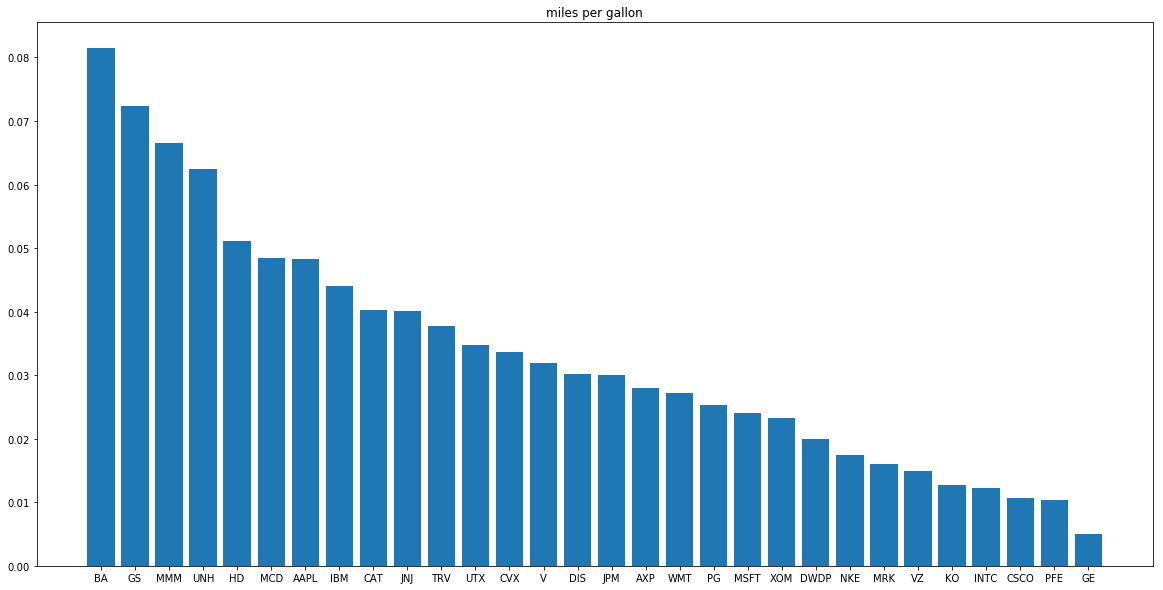

In [3]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(30), DJI_Sectors['weight'])
plt.xticks(np.arange(30), DJI_Sectors['symbol'])
plt.title('miles per gallon')
plt.show()

In [4]:
# Dow Jones Industrial 30 ###################################
DJI = pd.read_excel('Data/DJI/DJI.xlsx', skiprows = 25, header=1)
DJI['Symbol'] = 'DJI'
DJI['dailyReturns'] = DJI['Close'].pct_change()
DJI.head()

,Exchange Date,Close,Net,%Chg,Open,Low,High,Volume,Turnover,Approx VWAP,O-C,H-L,%CVol,%CTurn,Symbol,dailyReturns
0,2017-12-12,24504.80,118.77,0.004870,24452.96,24443.83,24552.97,342223357,NaN,NaN,51.84,109.14,0.138528,NaN,DJI,NaN
1,2017-12-11,24386.03,56.87,0.002338,24338.11,24314.74,24389.72,300583950,NaN,NaN,47.92,74.98,0.023828,NaN,DJI,-0.004847
2,2017-12-08,24329.16,117.68,0.004861,24263.26,24225.50,24330.12,293588460,NaN,NaN,65.90,104.62,-0.079835,NaN,DJI,-0.002332
3,2017-12-07,24211.48,70.57,0.002923,24116.60,24101.24,24262.88,319060597,NaN,NaN,94.88,161.64,0.020262,NaN,DJI,-0.004837
4,2017-12-06,24140.91,-39.73,-0.001643,24171.90,24134.49,24229.35,312724140,NaN,NaN,-30.99,94.86,-0.157507,NaN,DJI,-0.002915


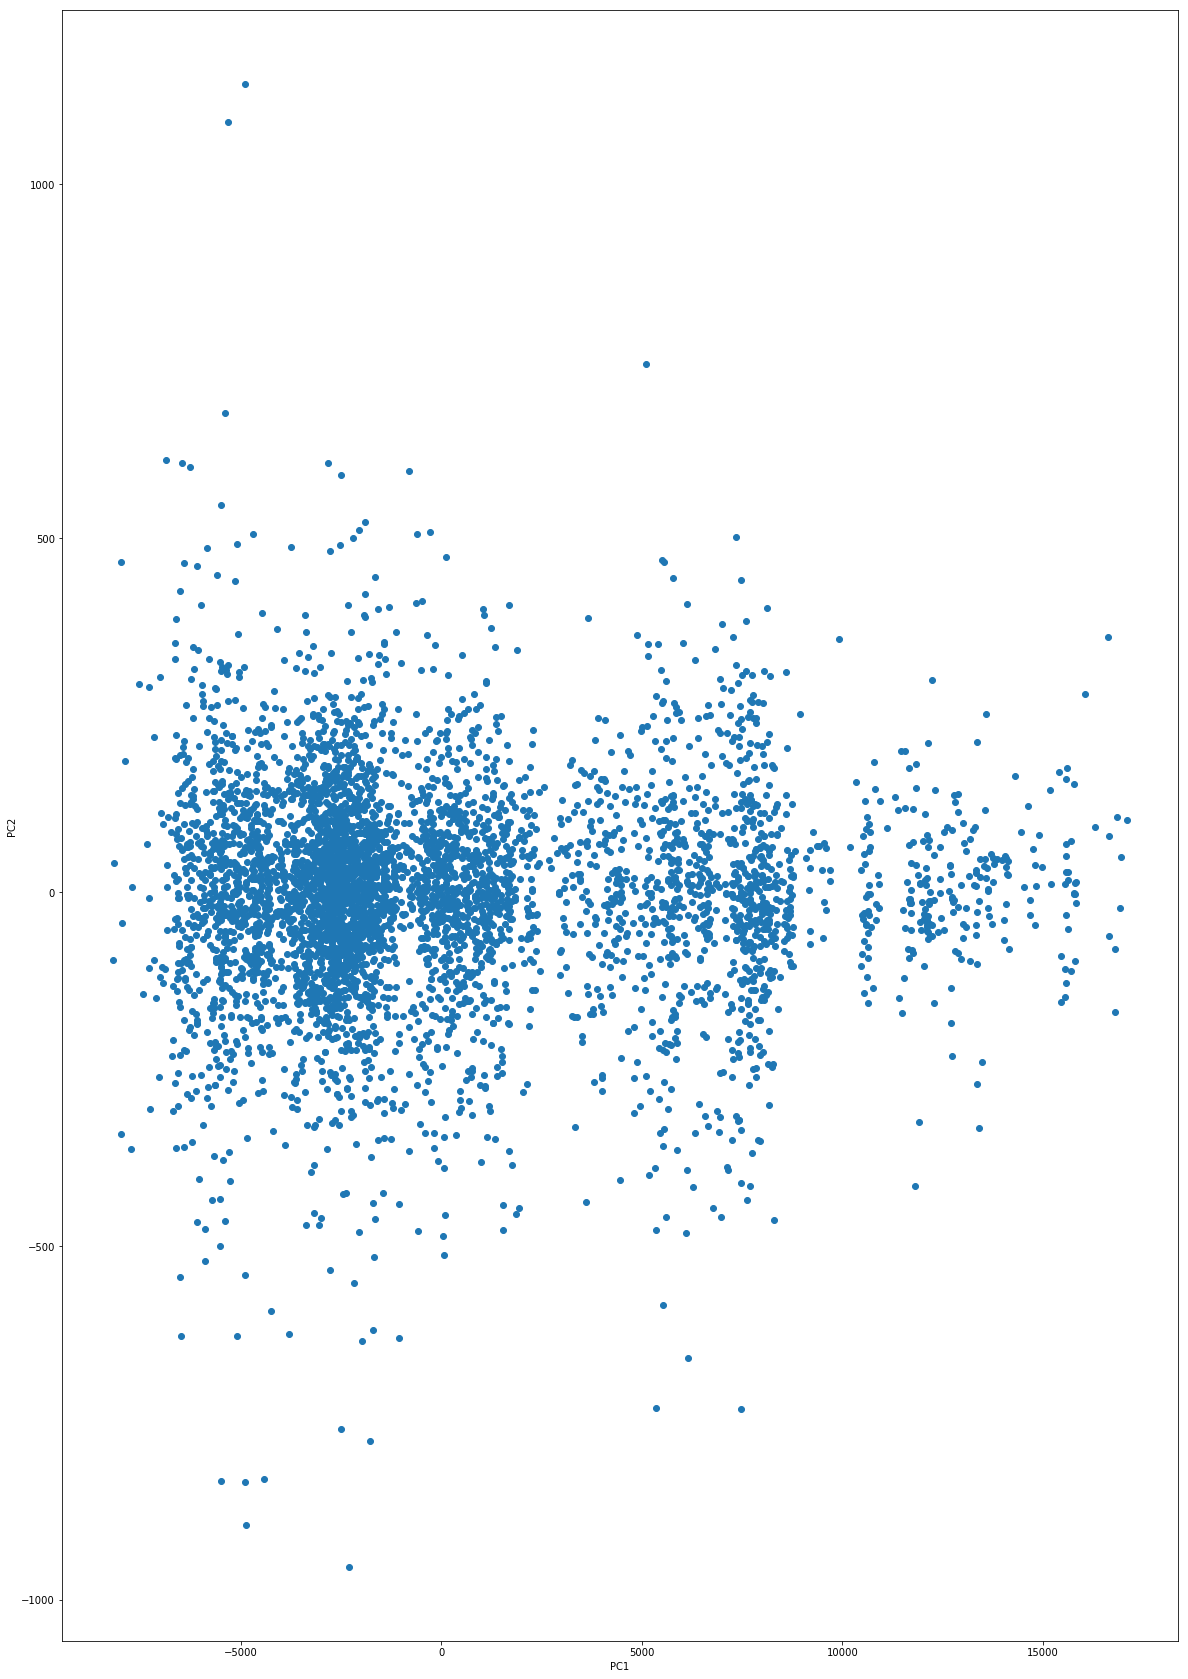

array([[  7.07293213e-01,   7.28377170e-04,   2.32704272e-08,
          7.06919925e-01],
       [  4.02439699e-01,   8.21724371e-01,   7.33436958e-05,
         -4.03498874e-01]])

In [5]:
close = DJI['Close']
close = close.fillna(0)
net = DJI['Net']
net = net.fillna(0)
chg = DJI['%Chg']
chg = chg.fillna(0)
open_ = DJI['Open']
open = open_.fillna(0)
X = np.array([close, net, chg, open_])

N = 2
pca = PCA(n_components=N)
X_pca = pca.fit_transform(np.transpose(X))

fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111)

ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()
pca.components_

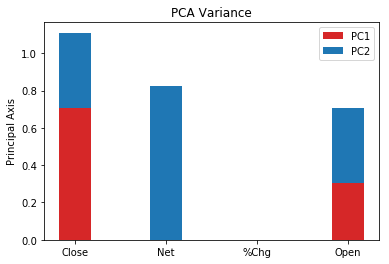

In [6]:

ind = np.arange(4)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, pca.components_[0], width, color='#d62728')
p2 = plt.bar(ind, pca.components_[1], width, bottom=pca.components_[0])
plt.ylabel('Principal Axis')
plt.title('PCA Variance')
plt.xticks(ind, ('Close', 'Net', '%Chg', 'Open'))
plt.legend((p1[0], p2[0]), ('PC1', 'PC2'))
plt.show()

In [7]:
DJI.mean()
DJI.var()

Close           1.245407e+07
Net             1.534977e+04
%Chg            1.297240e-04
Open            1.244095e+07
Low             1.247285e+07
High            1.241652e+07
Volume          9.137103e+15
Turnover                 NaN
Approx VWAP              NaN
O-C             1.481605e+04
H-L             8.619108e+03
%CVol           9.016690e-02
%CTurn                   NaN
dailyReturns    1.299475e-04
dtype: float64

In [8]:
# DataFrame for Merge
df = pd.DataFrame()

In [46]:
# Stocks ####################################################

# Apple
AAPL = pd.read_excel('Data/DJI/AAPL.xlsx', skiprows = 25)
AAPL = AAPL.loc[:,'Exchange Date':'%CTurn']
AAPL['Symbol'] = 'AAPL'
AAPL['dailyReturns'] = AAPL['Close'].pct_change()

df = df.append(AAPL, ignore_index = True)

# 3M
MMM = pd.read_excel('Data/DJI/MMM.xlsx', skiprows = 21)
MMM = MMM.loc[:,'Exchange Date':'%CTurn']
MMM['Symbol'] = 'MMM'
MMM['dailyReturns'] = MMM['Close'].pct_change()

df = df.append(MMM, ignore_index = True)

# American Express
AXP = pd.read_excel('Data/DJI/AXP.xlsx', skiprows = 25)
AXP = AXP.loc[:,'Exchange Date':'%CTurn']
AXP['Symbol'] = 'AXP'
AXP['dailyReturns'] = AXP['Close'].pct_change()

df = df.append(AXP, ignore_index = True)

# Boeing
BA = pd.read_excel('Data/DJI/BA.xlsx', skiprows = 22)
BA = BA.loc[:,'Exchange Date':'%CTurn']
BA['Symbol'] = 'BA'
BA['dailyReturns'] = BA['Close'].pct_change()

df = df.append(BA, ignore_index = True)

# Caterpiller
CAT = pd.read_excel('Data/DJI/CAT.xlsx', skiprows = 24)
CAT = CAT.loc[:,'Exchange Date':'%CTurn']
CAT['Symbol'] = 'CAT'
CAT['dailyReturns'] = CAT['Close'].pct_change()

df = df.append(CAT, ignore_index = True)

# Chevron Corporation
CVX = pd.read_excel('Data/DJI/CVX.xlsx', skiprows = 22)
CVX = CVX.loc[:,'Exchange Date':'%CTurn']
CVX['Symbol'] = 'CVX'
CVX['dailyReturns'] = CVX['Close'].pct_change()

df = df.append(CVX, ignore_index = True)

# Cisco Systems Inc
CSCO = pd.read_excel('Data/DJI/CSCO.xlsx', skiprows = 25)
CSCO = CSCO.loc[:,'Exchange Date':'%CTurn']
CSCO['Symbol'] = 'CSCO'
CSCO['dailyReturns'] = CSCO['Close'].pct_change()

df = df.append(CSCO, ignore_index = True)

# Coca-Cola Company
KO = pd.read_excel('Data/DJI/KO.xlsx', skiprows = 23)
KO = KO.loc[:,'Exchange Date':'%CTurn']
KO['Symbol'] = 'KO'
KO['dailyReturns'] = KO['Close'].pct_change()

df = df.append(KO, ignore_index = True)

# Walt Disney Company
DIS = pd.read_excel('Data/DJI/DIS.xlsx', skiprows = 23)
DIS = DIS.loc[:,'Exchange Date':'%CTurn']
DIS['Symbol'] = 'DIS'
DIS['dailyReturns'] = DIS['Close'].pct_change()

df = df.append(DIS, ignore_index = True)

# Exxon Mobil Corporation
XOM = pd.read_excel('Data/DJI/XOM.xlsx', skiprows = 25)
XOM = XOM.loc[:,'Exchange Date':'%CTurn']
XOM['Symbol'] = 'XOM'
XOM['dailyReturns'] = XOM['Close'].pct_change()

df = df.append(XOM, ignore_index = True)

# General Electric Company
GE = pd.read_excel('Data/DJI/GE.xlsx', skiprows = 22)
GE = GE.loc[:,'Exchange Date':'%CTurn']
GE['Symbol'] = 'GE'
GE['dailyReturns'] = GE['Close'].pct_change()

df = df.append(GE, ignore_index = True)

# Goldman Sachs Group Inc
GS = pd.read_excel('Data/DJI/GS.xlsx', skiprows = 21)
GS = GS.loc[:,'Exchange Date':'%CTurn']
GS['Symbol'] = 'CAT'
GS['dailyReturns'] = GS['Close'].pct_change()

df = df.append(GS, ignore_index = True)

# Home Depot Inc
HD = pd.read_excel('Data/DJI/HD.xlsx', skiprows = 26)
HD = HD.loc[:,'Exchange Date':'%CTurn']
HD['Symbol'] = 'HD'
HD['dailyReturns'] = HD['Close'].pct_change()

df = df.append(HD, ignore_index = True)

# International Business Machines Corporation
IBM = pd.read_excel('Data/DJI/IBM.xlsx', skiprows = 25)
IBM = IBM.loc[:,'Exchange Date':'%CTurn']
IBM['Symbol'] = 'IBM'
IBM['dailyReturns'] = IBM['Close'].pct_change()

df = df.append(IBM, ignore_index = True)

# Intel Corporation
INTC = pd.read_excel('Data/DJI/INTC.xlsx', skiprows = 23)
INTC = INTC.loc[:,'Exchange Date':'%CTurn']
INTC['Symbol'] = 'INTC'
INTC['dailyReturns'] = INTC['Close'].pct_change()

df = df.append(INTC, ignore_index = True)

# Johnson & Johnson
JNJ = pd.read_excel('Data/DJI/JNJ.xlsx', skiprows = 23)
JNJ = JNJ.loc[:,'Exchange Date':'%CTurn']
JNJ['Symbol'] = 'JNJ'
JNJ['dailyReturns'] = JNJ['Close'].pct_change()

df = df.append(JNJ, ignore_index = True)

# JPMorgan Chase & Co
JPM = pd.read_excel('Data/DJI/JPM.xlsx', skiprows = 26)
JPM = JPM.loc[:,'Exchange Date':'%CTurn']
JPM['Symbol'] = 'JPM'
JPM['dailyReturns'] = JPM['Close'].pct_change()

df = df.append(JPM, ignore_index = True)

# McDonald's Corporation
MCD = pd.read_excel('Data/DJI/MCD.xlsx', skiprows = 25)
MCD = MCD.loc[:,'Exchange Date':'%CTurn']
MCD['Symbol'] = 'MCD'
MCD['dailyReturns'] = MCD['Close'].pct_change()

df = df.append(MCD, ignore_index = True)

# Merck & Co. Inc
MRK = pd.read_excel('Data/DJI/MRK.xlsx', skiprows = 23)
MRK = MRK.loc[:,'Exchange Date':'%CTurn']
MRK['Symbol'] = 'MRK'
MRK['dailyReturns'] = MRK['Close'].pct_change()

df = df.append(MRK, ignore_index = True)

# Microsoft
MSFT = pd.read_excel('Data/DJI/MSFT.xlsx', skiprows = 24)
MSFT = MSFT.loc[:,'Exchange Date':'%CTurn']
MSFT['Symbol'] = 'MSFT'
MSFT['dailyReturns'] = MSFT['Close'].pct_change()

df = df.append(MSFT, ignore_index = True)

# Nike
NKE = pd.read_excel('Data/DJI/NKE.xlsx', skiprows = 23)
NKE = NKE.loc[:,'Exchange Date':'%CTurn']
NKE['Symbol'] = 'NKE'
NKE['dailyReturns'] = NKE['Close'].pct_change()

df = df.append(NKE, ignore_index = True)

# Pfizer Inc
PFE = pd.read_excel('Data/DJI/PFE.xlsx', skiprows = 25)
PFE = PFE.loc[:,'Exchange Date':'%CTurn']
PFE['Symbol'] = 'PFE'
PFE['dailyReturns'] = PFE['Close'].pct_change()

df = df.append(PFE, ignore_index = True)

# Procter & Gamble
PG = pd.read_excel('Data/DJI/PG.xlsx', skiprows = 24)
PG = PG.loc[:,'Exchange Date':'%CTurn']
PG['Symbol'] = 'PG'
PG['dailyReturns'] = PG['Close'].pct_change()

df = df.append(PG, ignore_index = True)

# Travelers Companies Inc
TRV = pd.read_excel('Data/DJI/TRV.xlsx', skiprows = 22)
TRV = TRV.loc[:,'Exchange Date':'%CTurn']
TRV['Symbol'] = 'TRV'
TRV['dailyReturns'] = TRV['Close'].pct_change()

df = df.append(TRV, ignore_index = True)

# United Technologies Corporation
UTX = pd.read_excel('Data/DJI/UTX.xlsx', skiprows = 23)
UTX = UTX.loc[:,'Exchange Date':'%CTurn']
UTX['Symbol'] = 'UTX'
UTX['dailyReturns'] = UTX['Close'].pct_change()

df = df.append(UTX, ignore_index = True)

# UnitedHealth Group Incorporated
UNH = pd.read_excel('Data/DJI/UNH.xlsx', skiprows = 21)
UNH = UNH.loc[:,'Exchange Date':'%CTurn']
UNH['Symbol'] = 'UNH'
UNH['dailyReturns'] = UNH['Close'].pct_change()

df = df.append(UNH, ignore_index = True)

# Verizon Coorporation
VZ = pd.read_excel('Data/DJI/VZ.xlsx', skiprows = 25)
VZ = VZ.loc[:,'Exchange Date':'%CTurn']
VZ['Symbol'] = 'VZ'
VZ['dailyReturns'] = VZ['Close'].pct_change()

df = df.append(VZ, ignore_index = True)

# Visa
V = pd.read_excel('Data/DJI/V.xlsx', skiprows = 22)
V = V.loc[:,'Exchange Date':'%CTurn']
V['Symbol'] = 'V'
V['dailyReturns'] = V['Close'].pct_change()

df = df.append(V, ignore_index = True)

# Wal-Mart Stores Inc
WMT = pd.read_excel('Data/DJI/WMT.xlsx', skiprows = 25)
WMT = WMT.loc[:,'Exchange Date':'%CTurn']
WMT['Symbol'] = 'WMT'
WMT['dailyReturns'] = WMT['Close'].pct_change()

df = df.append(WMT, ignore_index = True)

# DowDuPont Inc
DWDP = pd.read_excel('Data/DJI/DWDP.xlsx', skiprows = 26)
DWDP = DWDP.loc[:,'Exchange Date':'%CTurn']
DWDP['Symbol'] = 'DWDP'
DWDP['dailyReturns'] = DWDP['Close'].pct_change()

df = df.append(DWDP, ignore_index = True)

# adding DJI Index to DF
df = df.append(DJI,ignore_index = True)

ValueError: Could not interpret input 'Symbols'

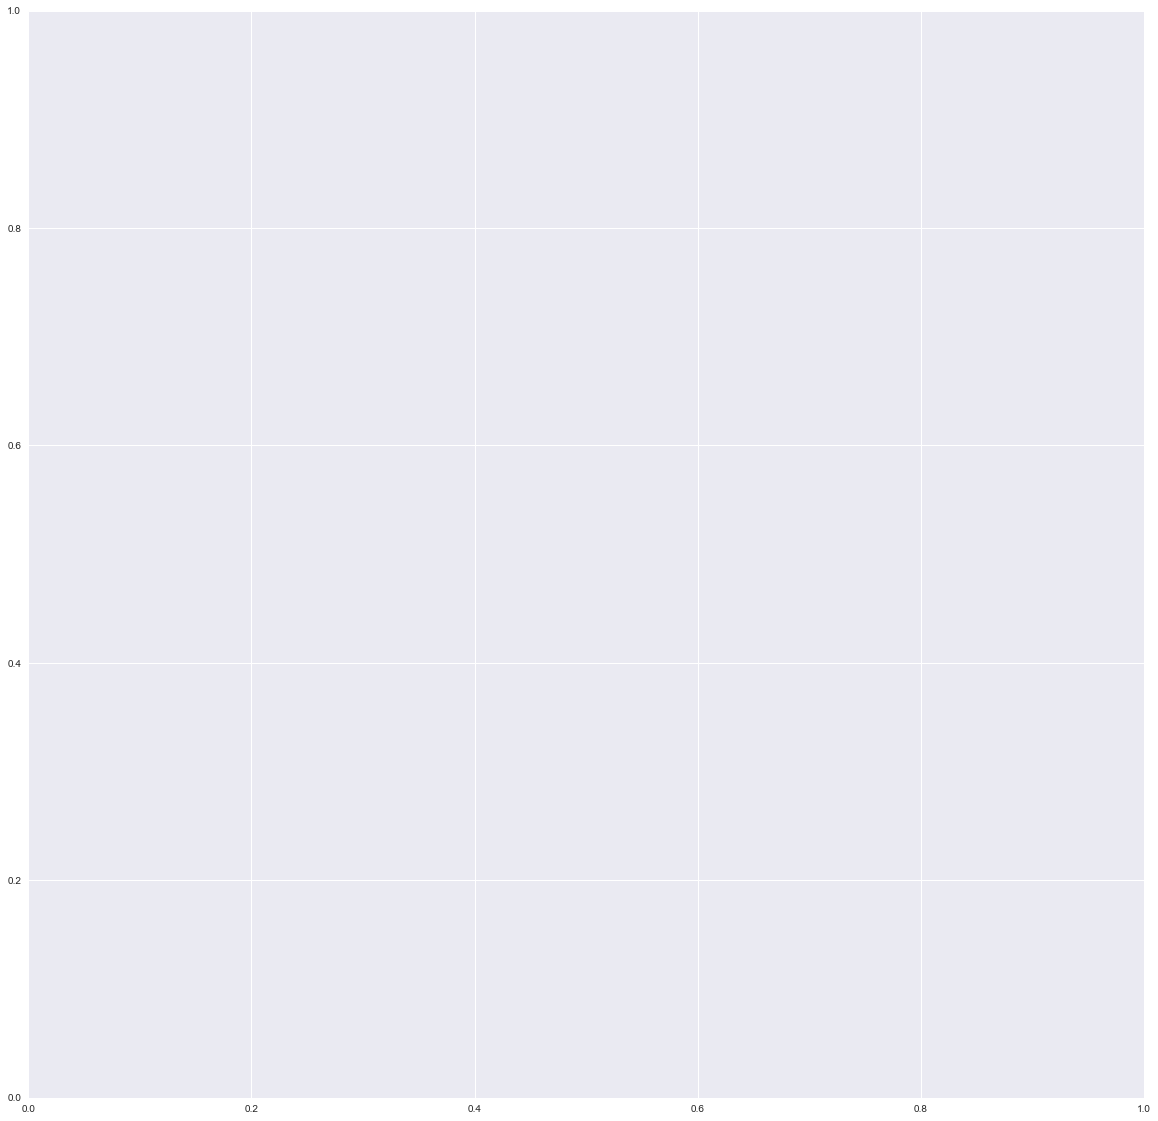

In [55]:
#x = pd.Series.unique(df)
#labels = [AAPL['Symbol'], AXP['Symbol'], BA, CAT, CSCO, KO, DIS, XOM, GE, GS

fig, ax = plt.subplots(figsize=(20, 20))
#ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
 #       shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

sns.countplot(x='Symbols', data=df, palette='Greens_d', ax=ax)

In [10]:
writer = pd.ExcelWriter('output.xlsx')

df.to_excel(writer, 'Sheet1')


# AAPL.to_excel(writer,'Sheet1')
# MMM.to_excel(writer,'Sheet2')

#BA.to_excel(writer,'Sheet1')
#GS.to_excel(writer,'Sheet2')
#MMM.to_excel(writer,'Sheet3')
#UNH.to_excel(writer,'Sheet4')
#HD.to_excel(writer,'Sheet5')
#MCD.to_excel(writer,'Sheet6')
#AAPL.to_excel(writer,'Sheet7')
#IBM.to_excel(writer,'Sheet8')
#CAT.to_excel(writer,'Sheet9')
#JNJ.to_excel(writer,'Sheet10')
#TRV.to_excel(writer,'Sheet11')
#UTX.to_excel(writer,'Sheet12')
#CVX.to_excel(writer,'Sheet13')
#V.to_excel(writer,'Sheet14')
#DIS.to_excel(writer,'Sheet15')
#JPM.to_excel(writer,'Sheet16')
#AXP.to_excel(writer,'Sheet17')
#WMT.to_excel(writer,'Sheet18')
#PG.to_excel(writer,'Sheet19')
#MSFT.to_excel(writer,'Sheet20')
#XOM.to_excel(writer,'Sheet21')
#DWDP.to_excel(writer,'Sheet22')
#NKE.to_excel(writer,'Shee23')
#MRK.to_excel(writer,'Sheet24')
#VZ.to_excel(writer,'Sheet25')
#KO.to_excel(writer,'Sheet26')
#INTC.to_excel(writer,'Sheet27')
#CSCO.to_excel(writer,'Sheet28')
#PFE.to_excel(writer,'Sheet29')
#GE.to_excel(writer,'Sheet30')

writer.save()

In [ ]:
def f(x):
    return x
interact(f, x=10);

In [ ]:

@interact(text='Hello', slider=(0,10),check=True,categories=['red','green','blue'])
def react(text,slider,check,categories):
    print(text,slider*10,check,categories)

In [14]:

@interact_manual(text='Hello', slider=(0,10),check=True,categories=['red','green','blue'])
def react(text,slider,check,categories):
    print(text,slider*10,check,categories)

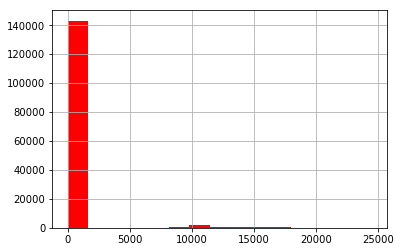

In [15]:
@interact(bins=(5, 25, 5),color=['red','green','orange','blue'])
def show_distplot(bins,color):
    df['Close'].hist(bins=bins, color=color)

C:\Users\Martin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


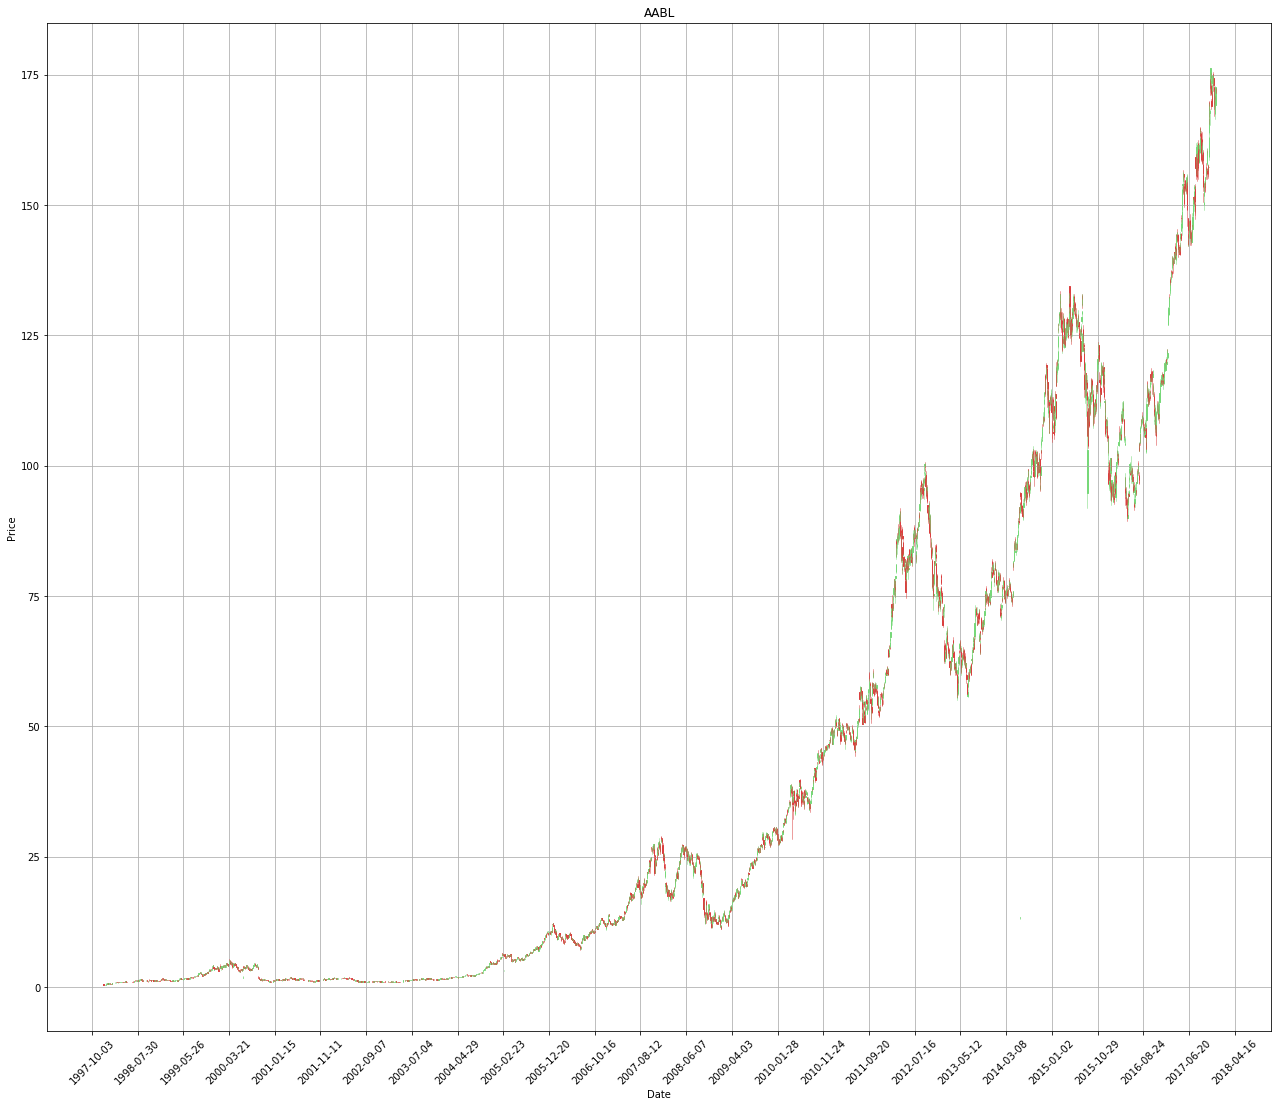

In [36]:
#fn.candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)
from datetime import datetime

df = AAPL
time = list(map(lambda x: matdates.date2num(x), df['Exchange Date']))
open_ = df['Open']
high = df['High']
low = df['Low']
close = df['Close']
volume = df['Volume']

x = 0
y = len(time)
ohlc = []

while x < y:
        append_me = time[x], open_[x], high[x], low[x], close[x], volume[x]
        ohlc.append(append_me)
        x+=1
        
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot2grid((1,1), (0,0))
matfn.candlestick_ohlc(ax1, ohlc, width=1, colorup='#77d879', colordown='#db3f3f')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)

ax1.xaxis.set_major_formatter(matdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(matticker.MaxNLocator(30))
ax1.grid(True)


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AABL')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()